In [13]:
# Import necessary libraries.
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Objective:
## Create a predictive model to accuratly predict used car prices in the market indicated in order to devise profitable pricing strategies.

------------------------

<a id='btt'></a>
**1. <a href = #link1>Overview of the data</a>**

**2. <a href = #link2>Data Preparation</a>**

**3. <a href = #link3>Data Visualization</a>**

**4. <a href = #link4>Missing Value and Outlier Treatment</a>**

**5. <a href = #link5>Data Preparation for modeling</a>**

**6  <a href = #link6>modeling</a>**

**7. <a href = #link7>Conclusion</a>**

# <a id='link1'>Overview of the data</a>

In [14]:
df = pd.read_csv("used_cars_data.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [15]:
df.shape

(7253, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**Observations**

- This dataset contains a lot of characters that are going to have to be removed from their numeric values.

- Just a cursory inspection shows there are many columns with missing values as well.

- I’m going to drop S.No, because it has no value in this dataset. 


# **2. <a href = #link2>Data Preparation</a>**
 <a href ='#btt'>back to top</a>

In [17]:
df.drop(['S.No.'],axis=1,inplace=True)

In [18]:
#creating a df to be used later in a function
money_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
    if df[colname].str.endswith('Cr').any() or df[colname].str.endswith('Lakh').any():  # using `.str` so I can use an element-wise string method
            money_cols.append(colname)
print(money_cols)
p_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
    if df[colname].str.endswith('bhp').any():# using `.str` so I can use an element-wise string method
        p_cols.append(colname)
print(p_cols)
e_cols = []
for colname in df.columns[df.dtypes == 'object']:  # only need to consider string columns
    if df[colname].str.endswith('CC').any()  or df[colname].str.endswith('kmpl').any():# using `.str` so I can use an element-wise string method
        e_cols.append(colname)
print(e_cols)

['New_Price']
['Power']
['Mileage', 'Engine']


In [19]:
#discovered some of the entries had "null bhp" instead of just being NaN.
#this had caused errors in the fuction below
df['Power'] = df['Power'].str.replace('null bhp', '')

In [20]:
def o_to_num(o_val):
    """This function takes in a float and removes characters and replaces them with blanks then 
    converts them to strings"""
    if isinstance(o_val, str):  
        multiplier = 1  
        if o_val.endswith('Lakh'):
            multiplier = 1
            return float(o_val.replace('Lakh', ''))* multiplier
        elif o_val.endswith('Cr'):
            multiplier = 100
            return float(o_val.replace('Cr', ''))* multiplier
        elif o_val.endswith('bhp'):          
            return float(o_val.replace('bhp', ''))
        elif o_val.endswith('kmpl'):
            return float(o_val.replace('kmpl', ''))
        elif o_val.endswith('km/kg'):
            return float(o_val.replace('km/kg', ''))
        elif o_val.endswith('CC'):
            return float(o_val.replace('CC', ''))       
    else: 
        return np.nan
for colname in money_cols:
    df[colname] = df[colname].apply(o_to_num)
for colname in p_cols:
    df[colname] = df[colname].apply(o_to_num)
for colname in e_cols:
    df[colname] = df[colname].apply(o_to_num)

In [21]:
df.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2245,Maruti Wagon R VXI 1.2,Mumbai,2015,55000,Petrol,Manual,First,21.50,1197.0,81.80,5.0,5.88,3.10
6407,Maruti Swift LXI Option,Kochi,2017,62889,Petrol,Manual,First,20.40,1197.0,81.80,5.0,NaN,NaN
1226,Toyota Corolla Altis 1.8 VL CVT,Delhi,2017,21000,Petrol,Automatic,First,14.28,1798.0,138.03,5.0,23.25,18.00
533,Honda City 1.5 V AT,Mumbai,2010,69000,Petrol,Automatic,Second,16.80,1497.0,118.00,5.0,NaN,2.85
6330,Hyundai i20 Asta 1.2,Kolkata,2015,33000,Petrol,Manual,First,18.60,1197.0,81.83,5.0,NaN,NaN
5931,Maruti Ertiga VXI,Mumbai,2012,52500,Petrol,Manual,Second,16.02,1373.0,93.70,7.0,NaN,5.25
2784,Nissan Micra Diesel XV,Hyderabad,2011,86732,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.60
5180,Skoda Superb Elegance 1.8 TSI AT,Bangalore,2009,75000,Petrol,Automatic,Second,13.70,1798.0,157.75,5.0,NaN,4.95
2722,Volkswagen Ameo 1.5 TDI Highline,Kochi,2018,31426,Diesel,Manual,First,21.66,1498.0,108.62,5.0,9.72,7.90
5322,Hyundai Grand i10 CRDi Sportz,Ahmedabad,2016,30000,Diesel,Manual,First,24.00,1120.0,70.00,5.0,NaN,5.50


In [22]:
df.drop(['New_Price'],axis=1,inplace=True)

I've also decided to drop New_Price because it's missing 85% of it's data and I don't beleive it will be helpful in our objectives

In [23]:
makesplit = df["Name"].str.split(" ", n = 1, expand = True) 
makesplit.head()

,0,1
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic


In [25]:
#seperating the make of the car and dropping  the model
df.drop(['Name'], axis=1, inplace=True)
df["Make"]= makesplit[0]   
df["Model"]= makesplit[1]
#df.drop(['Model'],axis=1,inplace=True)

In [26]:
df.Make.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [27]:
df.Model.unique()

array(['Wagon R LXI CNG', 'Creta 1.6 CRDi SX Option', 'Jazz V', ...,
       'EcoSport 1.5 Petrol Ambiente', 'Compass 1.4 Sport',
       'Elite i20 Magna Plus'], dtype=object)

In [ ]:
Binned_Model = pd.cut(df['Make'], [-np.inf, 5*12, 5*12+6, 6*12, np.inf])
binned_ht

In [153]:
df['Make'] = df['Make'].str.replace('ISUZU', 'Isuzu')

**Observations**
- It seemeda good idea to separate the make from the model in the name colomn.  
- This produced 33 unique makes of cars.
- I considered doing the same thing with the models as well and it produced 219 unique models of cars with 1893 varients of those models so I decide to drop models and keep the makes.  This seems sound considering one of the attributes of differnt models is the engine size and we've already captured that data.

In [154]:
df.nunique()

Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   9
Price                1373
Make                   32
dtype: int64

In [56]:
df.sample(n=10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make
3123,Mumbai,2010,41195,Petrol,Manual,First,15.00,1368.0,90.00,5.0,1.38,Tata
6647,Kochi,2015,48222,Diesel,Automatic,First,17.68,1968.0,174.33,5.0,NaN,Audi
5579,Pune,2007,68553,Petrol,Manual,Second,15.00,1586.0,104.68,5.0,1.50,Maruti
1083,Kolkata,2015,45000,Diesel,Manual,First,21.43,1364.0,87.20,5.0,7.35,Toyota
2961,Pune,2015,42023,Petrol,Automatic,First,15.50,1198.0,86.70,5.0,4.34,Honda
7155,Mumbai,2014,45000,Diesel,Automatic,First,19.27,2143.0,167.62,5.0,NaN,Mercedes-Benz
152,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.90,5.0,30.00,Mercedes-Benz
1305,Mumbai,2016,31000,Diesel,Automatic,First,17.05,1995.0,190.00,5.0,29.50,BMW
875,Kochi,2018,41736,Diesel,Automatic,First,11.36,2755.0,171.50,7.0,19.92,Toyota
5593,Chennai,2012,70000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,3.15,Hyundai


# <a id='link3'>3. Data Visualization</a>
 <a href ='#btt'>back to top</a>

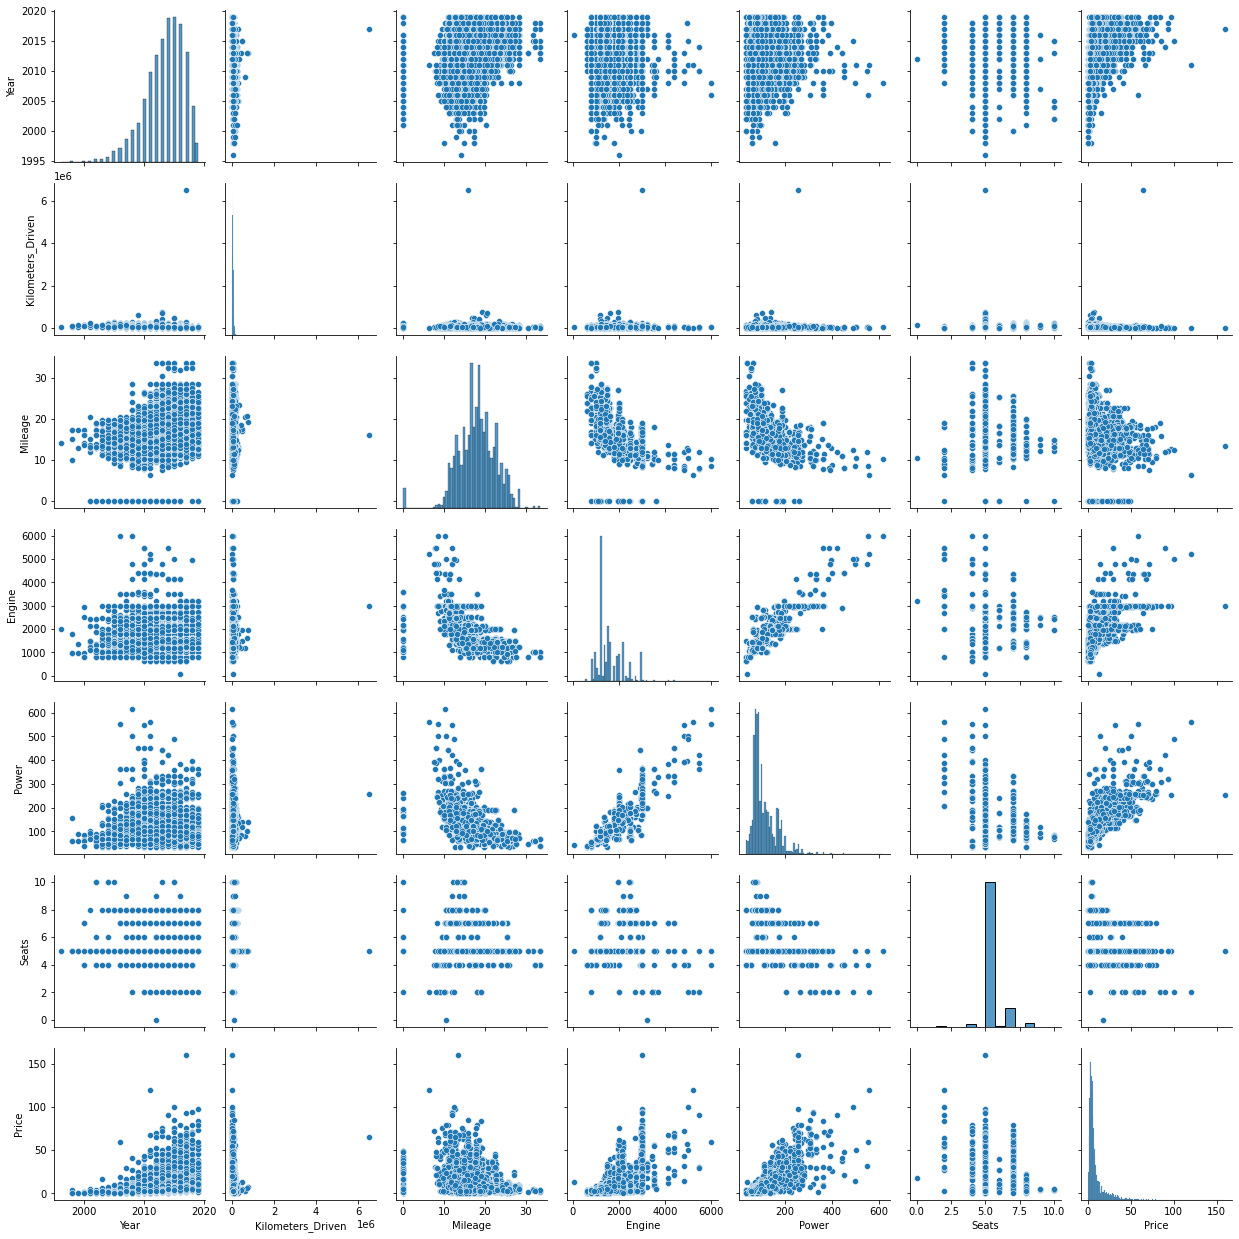

In [57]:
 sns.pairplot(df)

In [58]:

def histogram_boxplot(feature, figsize=(10, 5), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

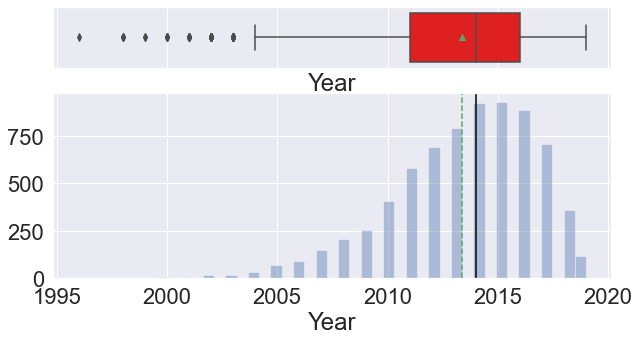

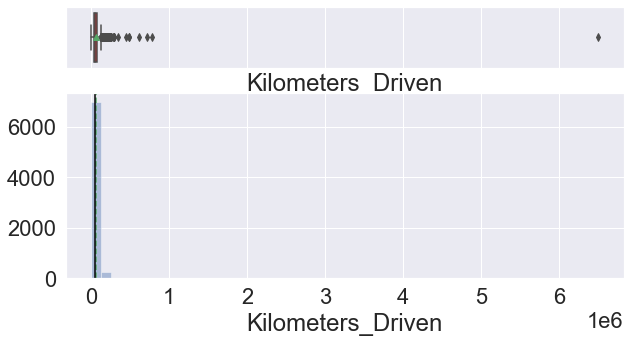

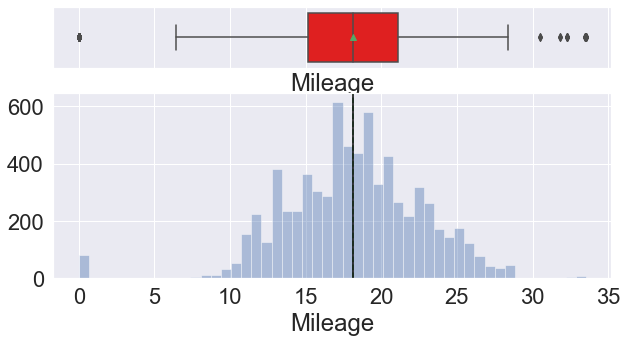

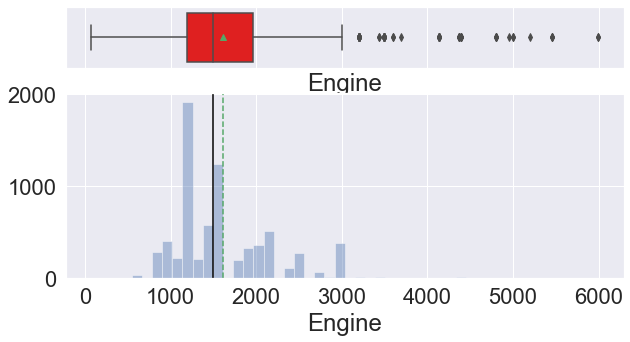

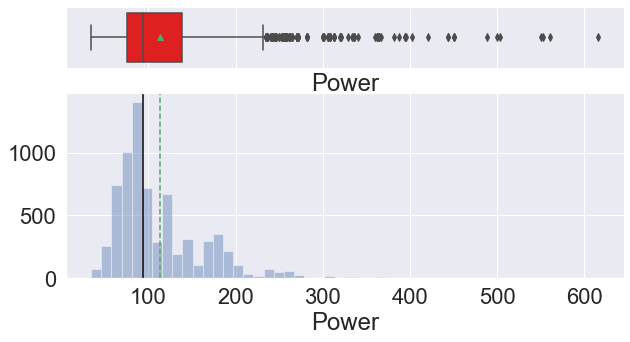

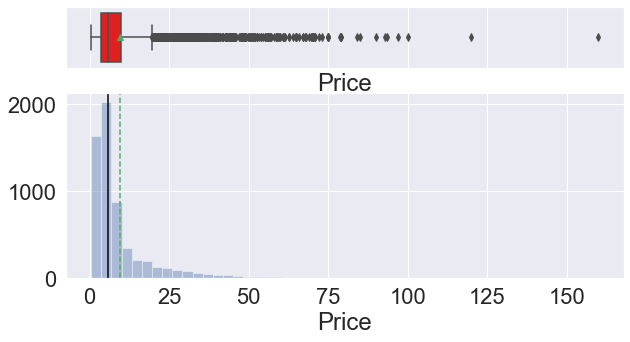

In [635]:
histogram_boxplot(df["Year"])
histogram_boxplot(df["Kilometers_Driven"])
histogram_boxplot(df["Mileage"])
histogram_boxplot(df["Engine"])
histogram_boxplot(df["Power"])
histogram_boxplot(df["Price"])

**Observation**
- Year is slightly scewed but I'm not as worried about it as it's a temporal variable
- Kilometers Driven is HIGHLY scewed with one outlier at 6.5 million miles.  That's alot of miles on a car.
- Mileage is normally distributed
- Engine and Power are both right scewed.
- Price is also right scewed

### Bivariate Analysis

<AxesSubplot:>

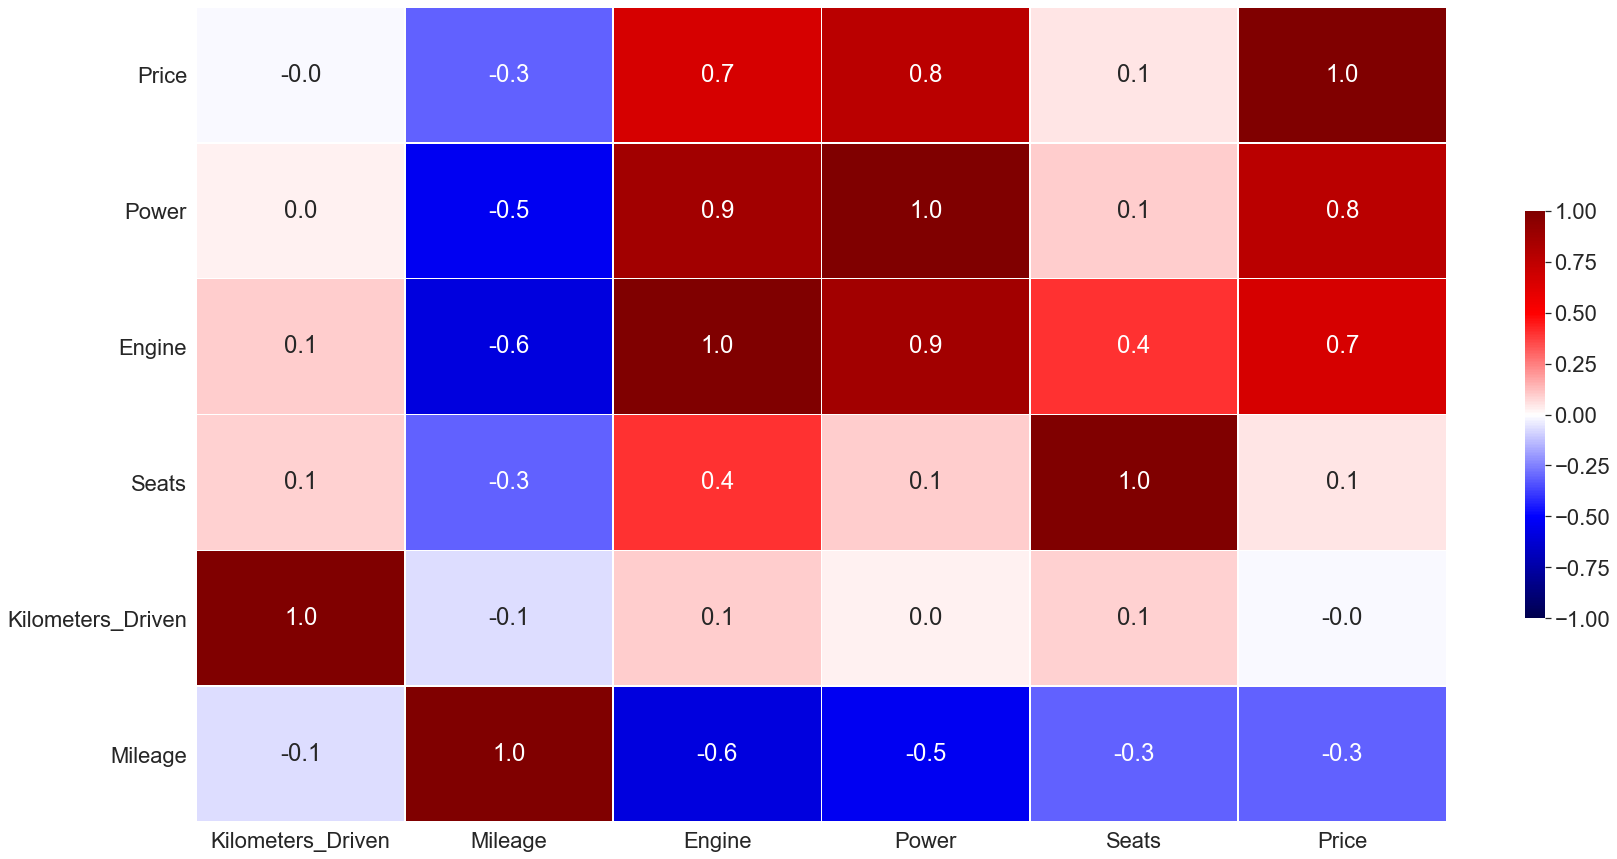

In [636]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")  # dropping year column as it is temporal variable
corr = (
    df[numeric_columns].corr().sort_values(by=["Price"], ascending=False)
)  # sorting correlations w.r.t Price

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

**Observation**
- Strong positive corelations between Price and Engine/Power
- Negative corelations between Price and mileage.
- Kilometers_Driven doesn't show a coreleation but I suspect that's because the data needs some work.  Common knowledge says that cars with higher odometer readings depreciate in value.  I'll explore this again later.

<AxesSubplot:xlabel='Power', ylabel='Engine'>

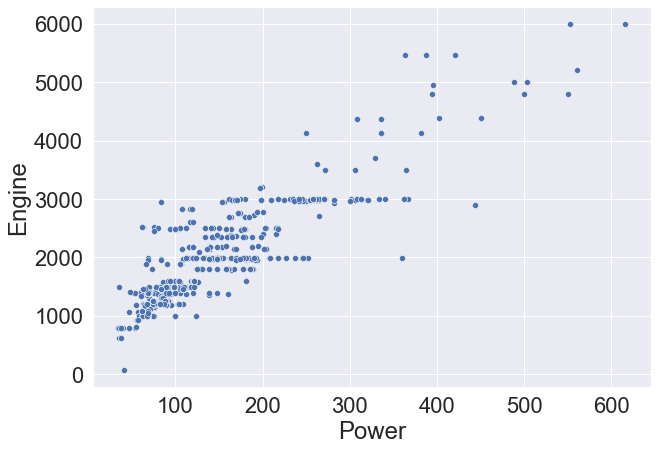

In [637]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Engine", x="Power", data=df)

<AxesSubplot:xlabel='Price', ylabel='Power'>

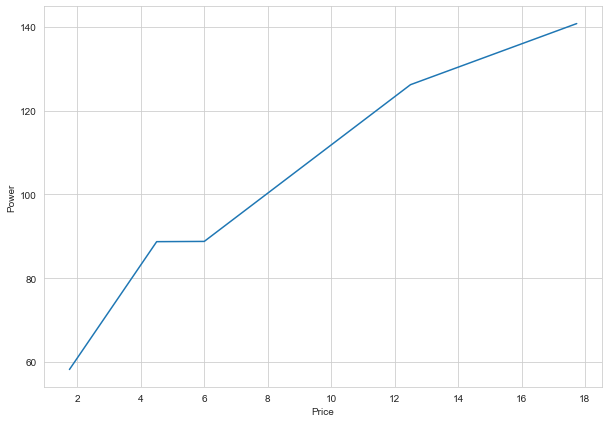

In [128]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='Price',y='Power', data=df.head() )

Engine and power have a strong linear relationship as commonsense would dictate.  As engine size increases so does the power it produces in most cases.

## Catagorical analysis

In [638]:
def ms_pc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

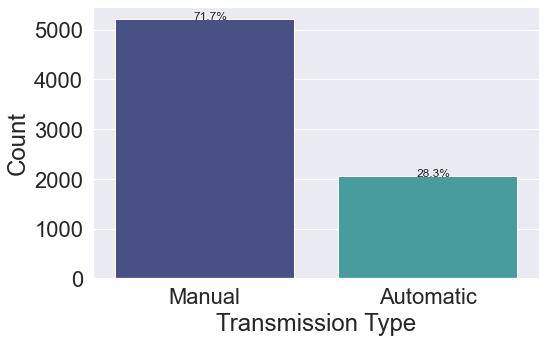

In [639]:
plt.figure(figsize=(8,5))
ax = sns.countplot(df['Transmission'], palette = 'mako')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
ms_pc(ax,df['Transmission'])

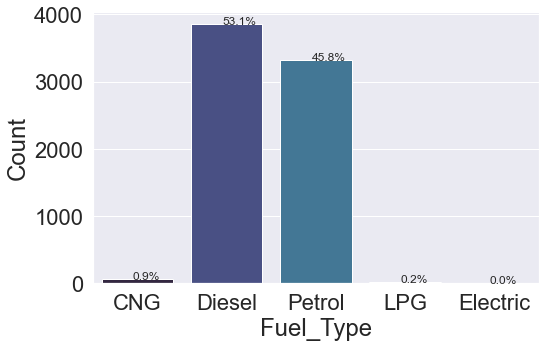

In [640]:
plt.figure(figsize=(8,5))
ax = sns.countplot(df['Fuel_Type'], palette = 'mako')
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
ms_pc(ax,df['Fuel_Type'])

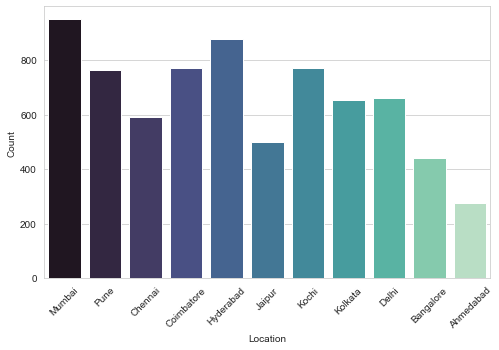

In [132]:
plt.figure(figsize=(8,5))
ax = sns.countplot(df['Location'], palette = 'mako')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45);


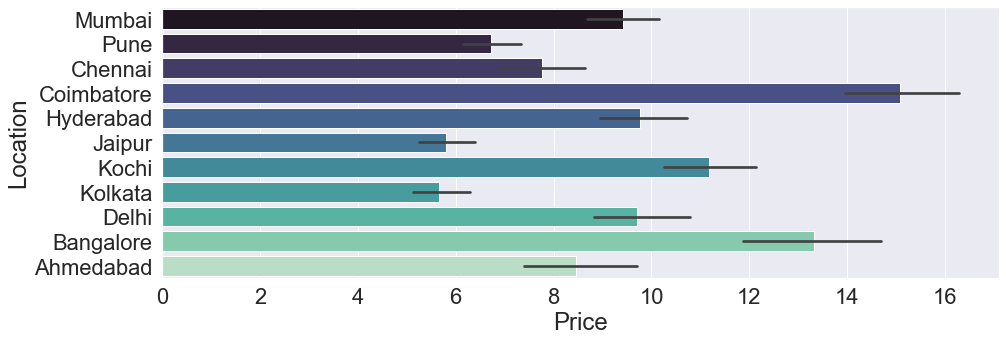

In [641]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='Price',y='Location', palette = 'mako')
plt.show()

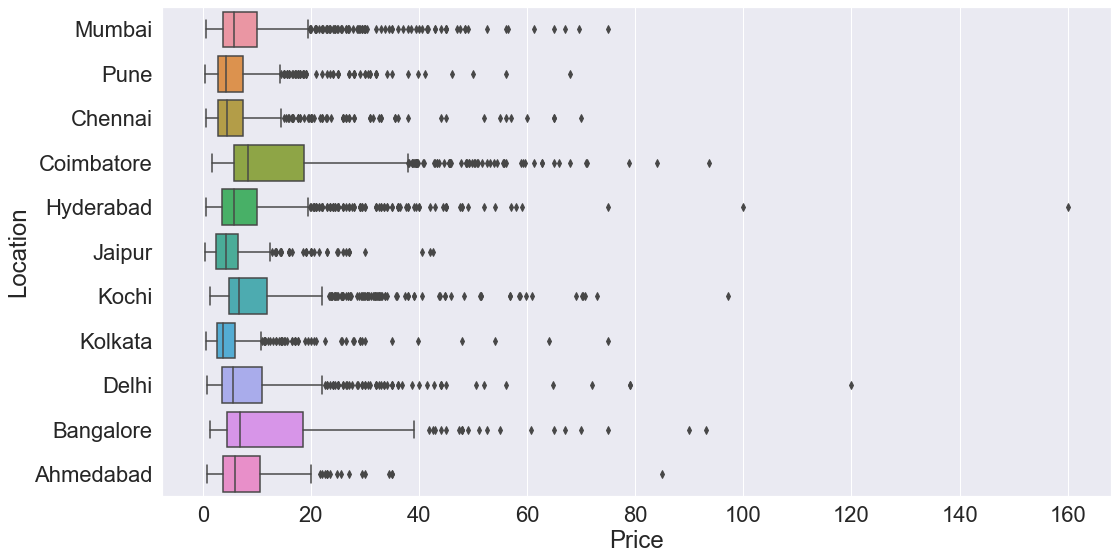

In [642]:
plt.figure(figsize=(17, 9))
sns.boxplot(y="Location", x="Price", data=df, )
plt.show()

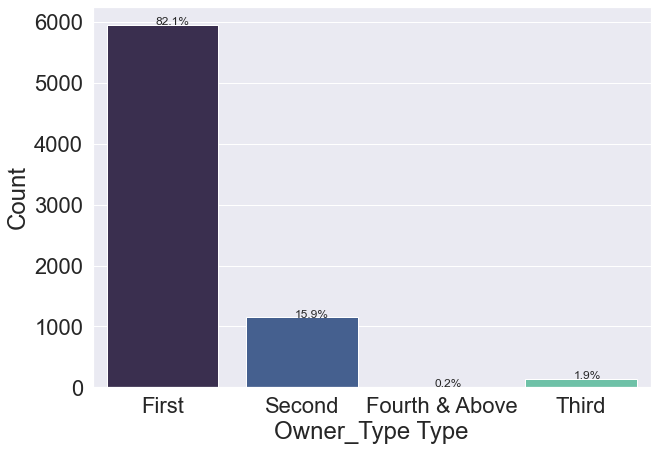

In [643]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Owner_Type'], palette = 'mako')
plt.xlabel('Owner_Type Type')
plt.ylabel('Count')
ms_pc(ax,df['Owner_Type'])

**Observations**
- Majority of cars sold are manual transmissions
- Coimbatore seems to fetch a higher price for cars while Kolkata is the lowerst (hypothesis testing needed to prove these two observations)
- Majority of cars are first owned
- Both Petrol and Diesel are the vast majority with Diesel being slightly higher
- Someone in Hyderabad is driving a lambo

### Log transformation

Some features are very skewed and will likely behave better on the log scale.

I'll transform both 'Price','Kilometers_Driven','Engine', and 'Power'.

In [155]:
df1=df.copy()

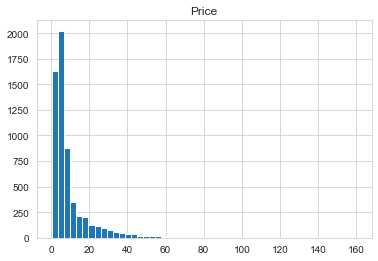

0


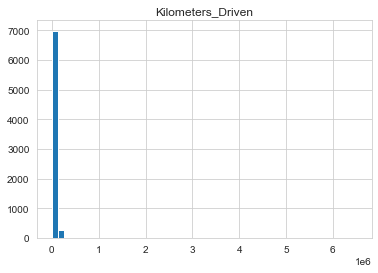

0


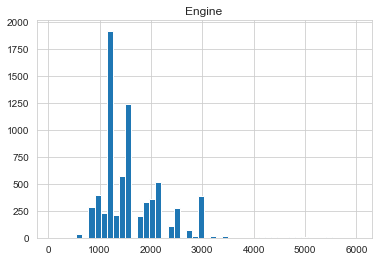

0


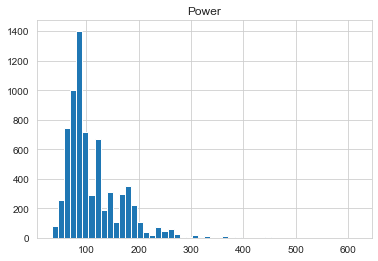

0


In [156]:
cols_to_log = ['Price','Kilometers_Driven','Engine', 'Power' ]
for colname in cols_to_log:
    plt.hist(df1[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

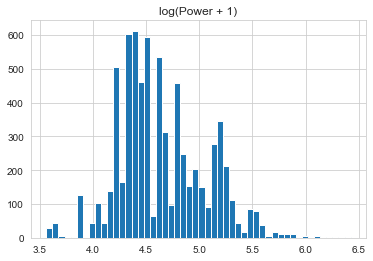

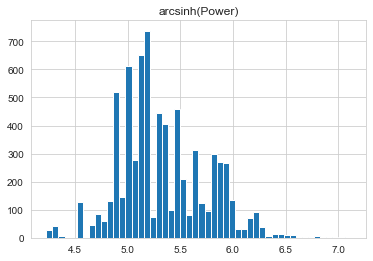

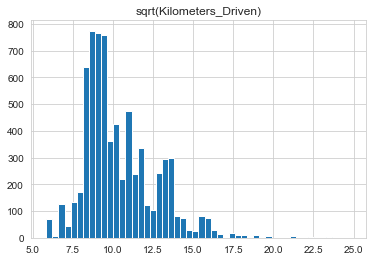

In [157]:
plt.hist(np.log(df1['Power'] + 1), 50)
plt.title('log(Power + 1)')
plt.show()
plt.hist(np.arcsinh(df1['Power']), 50)
plt.title('arcsinh(Power)')
plt.show()
plt.hist(np.sqrt(df1['Power']), 50)
plt.title('sqrt(Kilometers_Driven)')
plt.show()

In [158]:
for colname in cols_to_log:
    df1[colname + '_log'] = np.log(df[colname] + 1)
df1.drop(cols_to_log, axis=1, inplace=True)

In [159]:
#since owner type are numerical written in a category I've decided to change them to numerical values 
#instead of creating seperate columns later
df1.loc[df1['Owner_Type'] == 'First', 'Owner_Type'] = 1
df1.loc[df1['Owner_Type'] == 'Second', 'Owner_Type'] = 2
df1.loc[df1['Owner_Type'] == 'Third', 'Owner_Type'] = 3
df1.loc[df1['Owner_Type'] == 'Fourth & Above', 'Owner_Type'] = 4
df1['Owner_Type'] = df1['Owner_Type'].astype(float, errors = 'raise')

df1['Owner_Type'].value_counts(dropna=False)

1.0    5952
2.0    1152
3.0     137
4.0      12
Name: Owner_Type, dtype: int64

In [160]:
df1.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Make,Price_log,Kilometers_Driven_log,Engine_log,Power_log
0,Mumbai,2010,CNG,Manual,1.0,26.60,5.0,Maruti,1.011601,11.184435,6.906755,4.080246
1,Pune,2015,Diesel,Manual,1.0,19.67,5.0,Hyundai,2.602690,10.621352,7.367077,4.845761
2,Chennai,2011,Petrol,Manual,1.0,18.20,5.0,Honda,1.704748,10.736418,7.090077,4.496471
3,Chennai,2012,Diesel,Manual,1.0,20.77,7.0,Maruti,1.945910,11.373675,7.130099,4.497139
4,Coimbatore,2013,Diesel,Automatic,2.0,15.20,5.0,Audi,2.930660,10.613271,7.585281,4.954418


# <a id='link4'>Missing Value and Outlier Treatment</a>
 <a href ='#btt'>back to top</a>

### Missing Values

In [161]:
df1['Mileage'].replace(0, np.nan, inplace= True)
df1['Seats'].replace(0, np.nan, inplace= True)

I discovered that several data entries were entered as 0 instead of NaN.  It's an imposibility to have 0 seats or get 0 KPL

In [162]:
dfP = df1.copy()
dfP['Price_log'] = dfP['Price_log'].fillna(dfP['Price_log'].mean())

In [163]:
df1.dropna(subset = ["Price_log"], inplace=True)

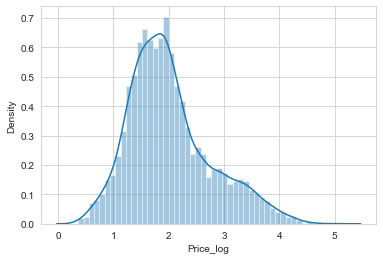

<AxesSubplot:xlabel='Price_log', ylabel='Density'>

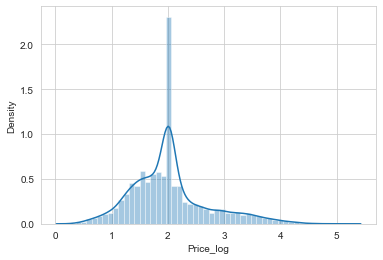

In [164]:
sns.distplot(df1['Price_log'])
plt.show()
sns.distplot(dfP['Price_log'])

I've also come to the decision that there are too many missing values in Price to replace them. This looks more normal than replacing 1/7th of the data with either the mean or the median.  

In [165]:
df1.isna().sum()

Location                   0
Year                       0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                   70
Seats                     43
Make                       0
Price_log                  0
Kilometers_Driven_log      0
Engine_log                36
Power_log                143
dtype: int64

In [167]:
df1['Mileage'] = df1['Mileage'].fillna(df1['Mileage'].mean()) #Mileage isn't heavily scewed so I'm filling NaN with mean
df1['Seats'] = df1['Seats'].fillna(df1['Seats'].mean()) #Since the mean for seats is 5 it sounds right to fill mising with mean
df1['Engine_log'] = df1['Engine_log'].fillna(df1['Engine_log'].median()) #both Engine and Power are scewed so I'm using median instead
df1['Power_log'] = df1['Power_log'].fillna(df1['Power_log'].median())
#df1['Price_log'] = df1['Price_log'].fillna(df1['Price_log'].mean())

In [168]:
df1.isna().sum()

Location                 0
Year                     0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Seats                    0
Make                     0
Price_log                0
Kilometers_Driven_log    0
Engine_log               0
Power_log                0
dtype: int64

### Outlier Treatment

In [169]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

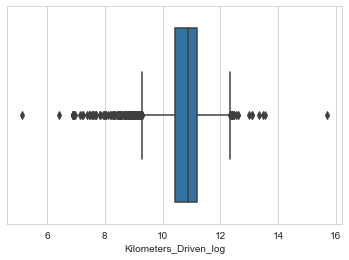

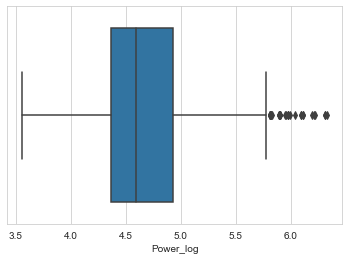

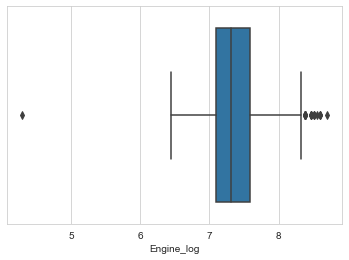

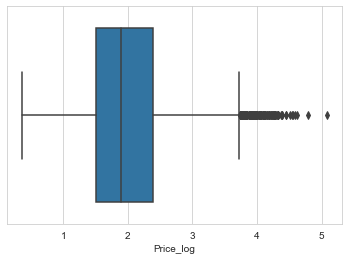

In [170]:
#data before outlier treatment
sns.boxplot(data=df1, x='Kilometers_Driven_log')
plt.show()
sns.boxplot(data=df1, x='Power_log')
plt.show()
sns.boxplot(data=df1, x='Engine_log')
plt.show()
sns.boxplot(data=df1, x='Price_log')
plt.show()

In [171]:
df1 = treat_outliers(df1,"Kilometers_Driven_log")
df1 = treat_outliers(df1,"Power_log")
df1 = treat_outliers(df1,"Engine_log")
#df1 = treat_outliers(df1,"Price_log")


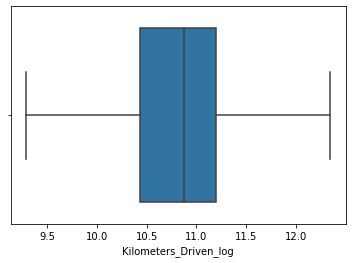

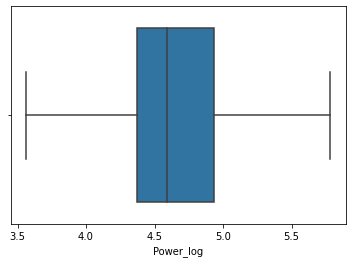

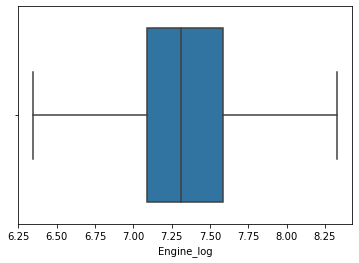

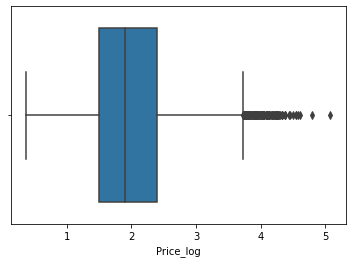

In [78]:
#data after outlier treatment
#data before outlier treatment
sns.boxplot(data=df1, x='Kilometers_Driven_log')
plt.show()
sns.boxplot(data=df1, x='Power_log')
plt.show()
sns.boxplot(data=df1, x='Engine_log')
plt.show()
sns.boxplot(data=df1, x='Price_log')
plt.show()

<AxesSubplot:>

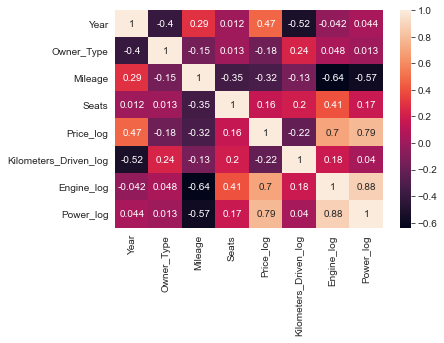

In [125]:
sns.heatmap(df1.corr(), annot=True)

Now that the data has been treated you can see clearer correlations specifically with Kilometers driven.

In [659]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.000000,2011.000000,2014.000000,2016.000000,2019.000000
Owner_Type,6019.0,1.202858,0.456356,1.000000,1.000000,1.000000,1.000000,4.000000
Mileage,6019.0,18.342252,4.151120,6.400000,15.400000,18.342252,21.100000,33.540000
Seats,6019.0,5.279618,0.803134,2.000000,5.000000,5.000000,5.000000,10.000000
Price_log,6019.0,2.018429,0.748221,0.364643,1.504077,1.893112,2.393339,5.081404
Kilometers_Driven_log,6019.0,10.783243,0.623619,9.288020,10.434145,10.878066,11.198228,12.344353
Engine_log,6019.0,7.331264,0.335376,6.344425,7.089243,7.309212,7.585789,8.330607
Power_log,6019.0,4.645526,0.404051,3.561046,4.369448,4.592085,4.934690,5.782553


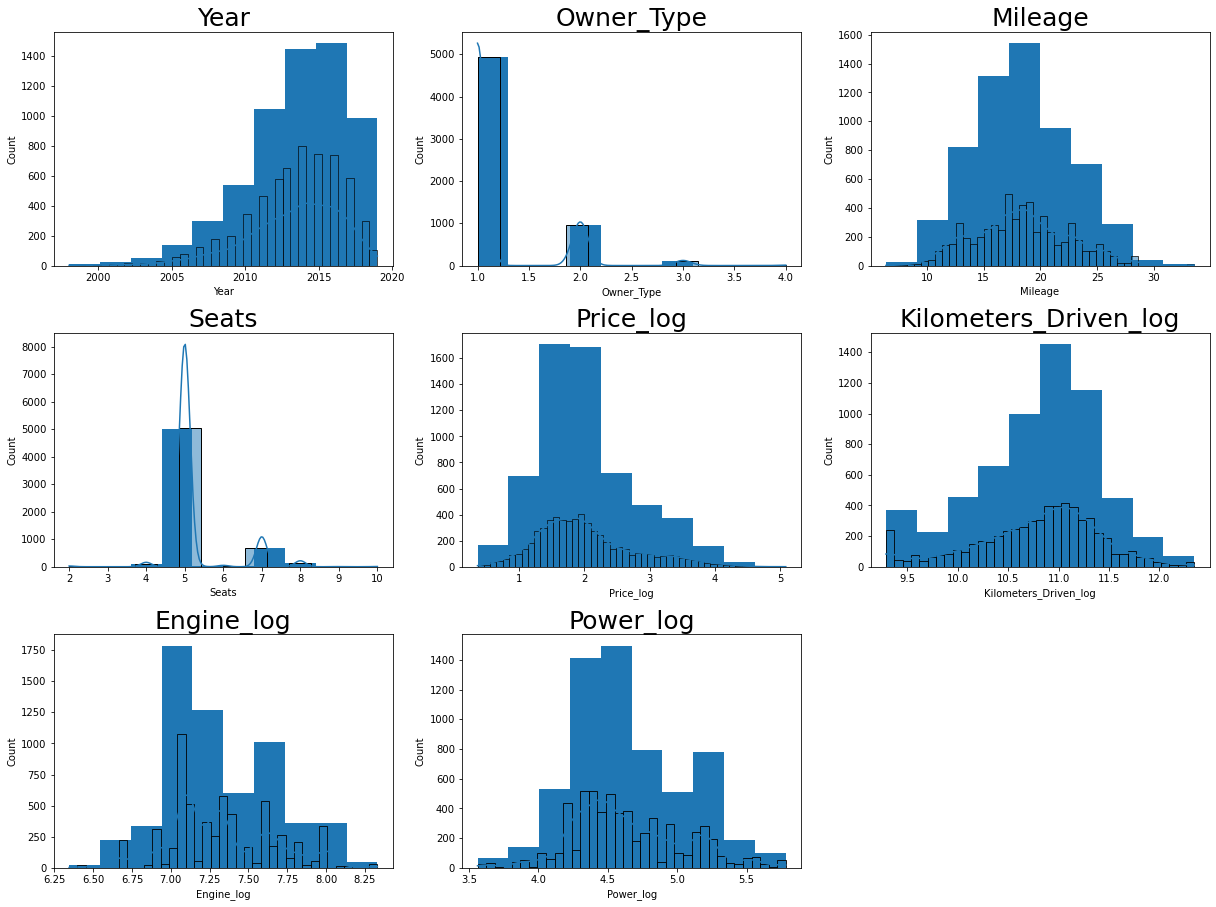

In [79]:
all_col = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(df1[all_col[i]])
    sns.histplot(df1[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

**Obeservations**
- The data seems to be more normally distributed than before

# <a id='link5'>Data Preparation for modeling</a>
 <a href ='#btt'>back to top</a>

In [172]:
df2 =df1.copy()

In [173]:
df2.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Make,Price_log,Kilometers_Driven_log,Engine_log,Power_log
0,Mumbai,2010,CNG,Manual,1.0,26.60,5.0,Maruti,1.011601,11.184435,6.906755,4.080246
1,Pune,2015,Diesel,Manual,1.0,19.67,5.0,Hyundai,2.602690,10.621352,7.367077,4.845761
2,Chennai,2011,Petrol,Manual,1.0,18.20,5.0,Honda,1.704748,10.736418,7.090077,4.496471
3,Chennai,2012,Diesel,Manual,1.0,20.77,7.0,Maruti,1.945910,11.373675,7.130099,4.497139
4,Coimbatore,2013,Diesel,Automatic,2.0,15.20,5.0,Audi,2.930660,10.613271,7.585281,4.954418


In [174]:
df2 = pd.get_dummies(df2, columns=["Location", "Make",'Transmission','Fuel_Type'], drop_first=True)

print(df2.columns)

Index(['Year', 'Owner_Type', 'Mileage', 'Seats', 'Price_log',
       'Kilometers_Driven_log', 'Engine_log', 'Power_log',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Make_Audi', 'Make_BMW', 'Make_Bentley',
       'Make_Chevrolet', 'Make_Datsun', 'Make_Fiat', 'Make_Force', 'Make_Ford',
       'Make_Honda', 'Make_Hyundai', 'Make_Isuzu', 'Make_Jaguar', 'Make_Jeep',
       'Make_Lamborghini', 'Make_Land', 'Make_Mahindra', 'Make_Maruti',
       'Make_Mercedes-Benz', 'Make_Mini', 'Make_Mitsubishi', 'Make_Nissan',
       'Make_Porsche', 'Make_Renault', 'Make_Skoda', 'Make_Smart', 'Make_Tata',
       'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol'],
      dtype='object')


In [175]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   6019 non-null   int64  
 1   Owner_Type             6019 non-null   float64
 2   Mileage                6019 non-null   float64
 3   Seats                  6019 non-null   float64
 4   Price_log              6019 non-null   float64
 5   Kilometers_Driven_log  6019 non-null   float64
 6   Engine_log             6019 non-null   float64
 7   Power_log              6019 non-null   float64
 8   Location_Bangalore     6019 non-null   uint8  
 9   Location_Chennai       6019 non-null   uint8  
 10  Location_Coimbatore    6019 non-null   uint8  
 11  Location_Delhi         6019 non-null   uint8  
 12  Location_Hyderabad     6019 non-null   uint8  
 13  Location_Jaipur        6019 non-null   uint8  
 14  Location_Kochi         6019 non-null   uint8  
 15  Loca

In [176]:
X = df2.drop(["Price_log"], axis=1)
y = df2[["Price_log"]]

print(X.head())
print(y.head())

   Year  Owner_Type  Mileage  Seats  Kilometers_Driven_log  Engine_log  \
0  2010         1.0    26.60    5.0              11.184435    6.906755   
1  2015         1.0    19.67    5.0              10.621352    7.367077   
2  2011         1.0    18.20    5.0              10.736418    7.090077   
3  2012         1.0    20.77    7.0              11.373675    7.130099   
4  2013         2.0    15.20    5.0              10.613271    7.585281   

   Power_log  Location_Bangalore  Location_Chennai  Location_Coimbatore  \
0   4.080246                   0                 0                    0   
1   4.845761                   0                 0                    0   
2   4.496471                   0                 1                    0   
3   4.497139                   0                 1                    0   
4   4.954418                   0                 0                    1   

   Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  \
0               0             

In [177]:
print(X.shape)
print(y.shape)

(6019, 51)
(6019, 1)


# <a id='link6'>Data modeling</a>
 <a href ='#btt'>back to top</a>

In [178]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [179]:
from  sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [180]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train_norm, y_train)

LinearRegression()

In [181]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [182]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,3825.456351,218343.080113,3825.460758,-2.649321e+07


In [183]:
print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,3825.227157,220920.030088,3825.231899,-2.536382e+07


These results are unusual compared to other trial models I've performed on this dataset.  The difference in this model compared to others is scaling the data.  However, I get better results in statsmodel further on.

## Linear Regression using statsmodels

In [184]:
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1261.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        11:08:39   Log-Likelihood:                 1051.4
No. Observations:                4213   AIC:                            -2005.
Df Residuals:                    4164   BIC:                            -1694.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -177.09

### TEST FOR MULTICOLLINEARITY

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                    884618.576632
Year                          2.270640
Owner_Type                    1.266118
Mileage                       4.125014
Seats                         2.477641
Kilometers_Driven_log         1.918877
Engine_log                   11.852934
Power_log                     8.812576
Location_Bangalore            2.485729
Location_Chennai              3.000156
Location_Coimbatore           3.536474
Location_Delhi                3.180578
Location_Hyderabad            3.833131
Location_Jaipur               2.694384
Location_Kochi                3.583568
Location_Kolkata              3.153361
Location_Mumbai               4.029912
Location_Pune                 3.444553
Make_Audi                   231.783931
Make_BMW                    261.149282
Make_Bentley                  2.027487
Make_Chevrolet              121.148818
Make_Datsun                  14.180273
Make_Fiat                    29.255534
Make_Force                    4.051019
Make_Ford  

### Removing Multicollinearity

In [186]:
# we drop the one with the highest vif values and check the adjusted R-squared
X_train2 = X_train1.drop("Engine_log", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                     0.000000
Year                      2.227478
Owner_Type                1.268609
Mileage                   3.618870
Seats                     2.507992
Kilometers_Driven_log     1.907632
Power_log                 4.208735
Location_Bangalore        2.600454
Location_Chennai          3.017692
Location_Coimbatore       3.605799
Location_Delhi            3.266706
Location_Hyderabad        3.908768
Location_Jaipur           2.704276
Location_Kochi            3.664208
Location_Kolkata          3.225705
Location_Mumbai           4.086976
Location_Pune             3.529517
Make_Audi                      inf
Make_BMW                       inf
Make_Bentley                   NaN
Make_Chevrolet                 inf
Make_Datsun                    inf
Make_Fiat                      inf
Make_Force                     inf
Make_Ford                      inf
Make_Honda                     inf
Make_Hyundai                   inf
Make_Isuzu                     inf
Make_J

In [188]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1259.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        11:08:55   Log-Likelihood:                 1005.6
No. Observations:                4213   AIC:                            -1915.
Df Residuals:                    4165   BIC:                            -1611.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -174.12

There are no further P-Values higher than 0.05 that are not part of a catagorical set that need to be removed.

In [189]:
residual = olsres1.resid
np.mean(residual)

-1.788924785398452e-13

Mean of redisuals is very close to 0.

### TEST FOR LINEARITY 

In [190]:
residual = olsres1.resid
fitted = olsres1.fittedvalues  # predicted values

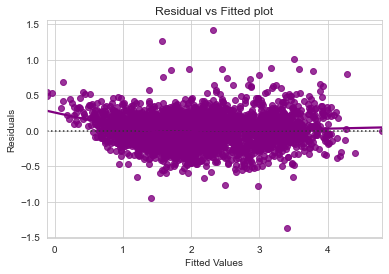

In [191]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

* Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **I see no pattern in the plot above. Hence, the assumption is satisfied.**

### TEST FOR NORMALITY

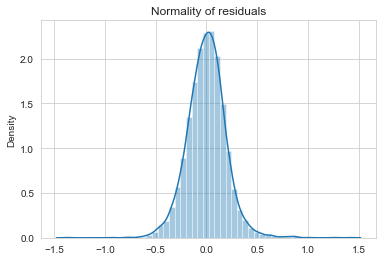

In [192]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

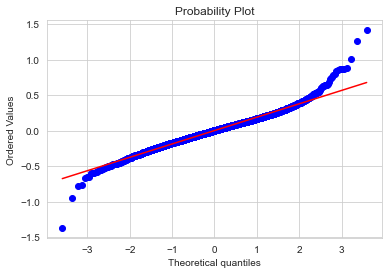

In [193]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

In [194]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9770305752754211, pvalue=1.5069021924543566e-25)

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal.
* Hence we go with the QQ plot and say that residuals are normal.

### TEST FOR HOMOSCEDASTICITY

In [195]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train2)
lzip(name, test)

[('F statistic', 1.0286230116983124), ('p-value', 0.2609674903310121)]

P-value is greater than 0.05 and we can conclude the model is heteroscedastic

In [196]:
X_test_final = X_test[X_train2.columns]

In [197]:
print("Train Performance\n")
model_perf(olsres1, X_train2.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.143839,8.198729,0.190588,0.93424


In [198]:
print("Test Performance\n")
model_perf(olsres1, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.162116,9.617602,0.323699,0.818372


**Observations**

- The training and testing scores are 93% and 82% respectively, and both the scores are comparable. Hence, the model is a decent fit but likely suffers from some overfitting.

- R-squared is 0.818 on the test set, i.e., the model explains 81.8% of total variation in the test dataset. So, overall the model is satisfactory.

- MAE indicates that our current model is able to predict Price within a mean error of 0.16 Lahk on the test data.

- MAPE on the test set suggests we can predict within 9.6% of the Price.

# <a id='link7'>Conclusions</a>
 <a href ='#btt'>back to top</a>

In [199]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1259.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        11:09:45   Log-Likelihood:                 1005.6
No. Observations:                4213   AIC:                            -1915.
Df Residuals:                    4165   BIC:                            -1611.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -174.12

***olsres1* is my final model which follows all the assumptions, and can be used for interpretations.**
1.  Engine Power has one of the highest effects on price.  Higher power cars can fetch a higher price.  Kilometers driven has a negative effect on price.  
2.  Location does matter.  Selling a car in Bangalore has the highest positive influence on price.
3.  This model shows the different effects of the Make on the price of the car.
